## Libraries

In [3]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=27bb228adc5cc095645e0f5e4688460964397b26af83d9a83748de3ff3453d30
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b5/12/81/97d5fe1c20677971f3ad0d93e7b8b38bb7ac85496c17a13343
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=b22650ec8ccfa32e98dd5319eabf53f92424657aa559a705bf4d69bc596f6ae5
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking


In [4]:
import yfinance as yf
from matplotlib import pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## How to use yfinance library

### Get ticker info

In [15]:
mystock = "KN.PA"
myticker = yf.Ticker(mystock)

In [16]:
print(myticker.info)

{'zip': '75013', 'sector': 'Financial Services', 'fullTimeEmployees': 16943, 'longBusinessSummary': 'Natixis S.A. provides asset and wealth management, corporate and investment banking, insurance, and payment services primarily in the Americas, the Asia-Pacific, Europe, the Middle East, and Africa. The company offers wealth management, asset management, and savings and retirement services. It also provides corporate and investment banking services, such as investment banking, and merger and acquisition; capital market, structured and cinema financing; trade finance; and treasury services. In addition, the company offers life insurance, savings, transfer of assets, retirement, death insurance, long-term care insurance, borrower insurance, car insurance, home insurance, health insurance, life accident guarantee, multimedia equipment insurance, legal protection, parabank insurance, remote monitoring, and professional insurance products. Further, it provides online and omni-channel payment

In [20]:
# for key in myticker.info:
#     print(key)

print(myticker.info["longName"])

Natixis S.A.


### Parameters for the history function

### Get history of a stock

In [12]:
hist = myticker.history(period="1y")

In [13]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-14,1.909922,1.935388,1.782594,1.812304,12008160,0.0,0
2020-04-15,1.798722,1.799571,1.663754,1.663754,12317338,0.0,0
2020-04-16,1.716383,1.774105,1.634893,1.653144,11248031,0.0,0
2020-04-17,1.758826,1.761373,1.697708,1.707046,10624506,0.0,0
2020-04-20,1.729965,1.731663,1.659510,1.690918,6801095,0.0,0


<AxesSubplot:title={'center':'KN.PA\nNatixis S.A.'}, xlabel='Date'>

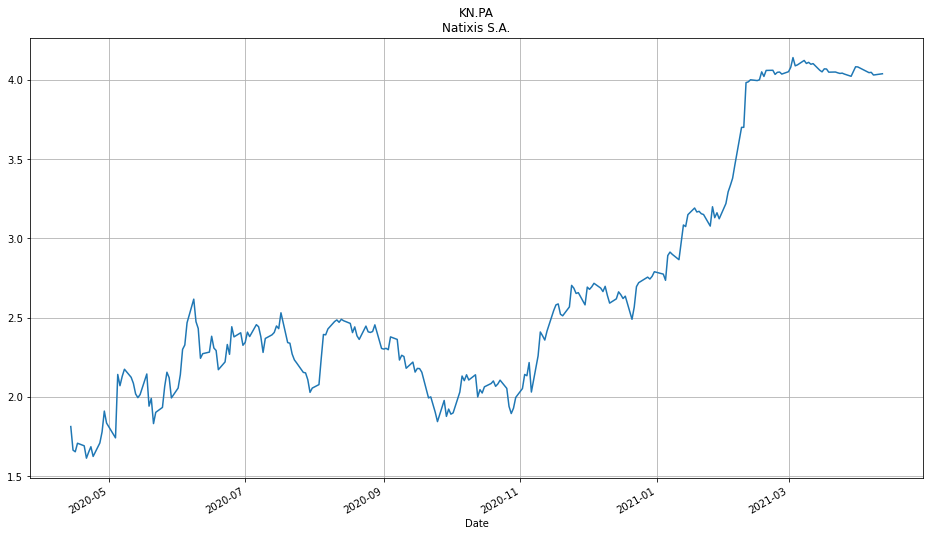

In [25]:
hist["Close"].plot(figsize=(16,9), grid=True, title=f"{mystock}\n{myticker.info['longName']}")

### yf.download function

In [38]:
euronext100 = ['KBC.BR', 'JMT.LS', 'BNP.PA', 'BN.PA', 'GBLB.BR', 'KN.PA', 'AGS.BR', 'LR.PA', 'MC.PA', 'ABI.BR', 'EDEN.PA', 'RDSA.AS', 'OR.PA', 'CAP.PA', 'SAN.PA', 'GALP.LS', 'SW.PA', 'INGA.AS', 'KER.PA', 'PHIA.AS', 'ATO.PA', 'ILD.PA', 'COV.PA', 'AIR.PA', 'AC.PA', 'TEP.PA', 'UBI.PA', 'ASML.AS', 'RAND.AS', 'VIE.PA']

In [91]:
data = yf.download(
    tickers=euronext100,
    period="2y",
    interval="1d",
)["Close"]

[*********************100%***********************]  30 of 30 completed


In [92]:
# data

In [93]:
df_diff = (data/data.iloc[0] - 1) * 100

In [94]:
df_diff

,ABI.BR,AC.PA,AGS.BR,AIR.PA,ASML.AS,ATO.PA,BN.PA,BNP.PA,CAP.PA,COV.PA,...,MC.PA,OR.PA,PHIA.AS,RAND.AS,RDSA.AS,SAN.PA,SW.PA,TEP.PA,UBI.PA,VIE.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-15,0.280568,-0.727176,0.087444,-1.146712,-0.928829,2.991363,0.835737,1.155133,0.763015,-0.314799,...,0.014587,-0.749065,1.348657,1.145355,-0.174342,-0.530506,-1.865141,-0.810651,0.049105,1.026398
2019-04-16,0.739694,-0.134660,1.202447,-0.573356,0.828109,1.639714,0.403456,2.904029,0.359068,0.472190,...,0.991541,0.000000,1.419647,1.332777,-0.453281,-0.397882,-2.773794,-1.968728,-1.816837,2.981430
2019-04-17,-0.063771,1.669806,1.967638,0.370997,0.705010,3.257259,0.288180,4.588147,0.089765,-0.314799,...,2.318464,0.998749,0.752402,1.811743,-0.174342,-3.103453,-2.104261,-3.184713,-2.528846,3.861197
2019-04-18,1.823738,1.615940,1.836467,1.382799,2.517905,4.608907,1.440922,5.764875,-0.044886,-0.629597,...,2.741322,1.206822,0.312317,2.478131,-0.435844,-3.355436,-1.626021,-2.953093,-1.546774,2.883676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,-31.105729,-8.456772,13.161339,-15.092750,198.399723,-16.683880,-15.389049,12.166690,33.752242,-21.070306,...,68.212306,37.806904,43.106413,27.863392,-41.171550,11.870022,-19.923483,82.107704,-17.972010,9.139789
2021-04-07,-31.692388,-9.938062,12.286836,-15.227654,193.699654,-13.595942,-14.063403,12.900793,33.707356,-20.419734,...,68.328965,37.619645,42.845693,28.779674,-41.192472,11.564988,-20.019129,81.644480,-18.192978,9.042036
2021-04-08,-30.417040,-10.638300,11.368598,-15.008428,197.672335,-14.091178,-13.414987,12.274644,34.694794,-20.755515,...,70.924464,41.323347,46.466806,30.112451,-42.608093,12.347477,-19.904356,85.350325,-17.210897,8.651029


<AxesSubplot:xlabel='Date'>

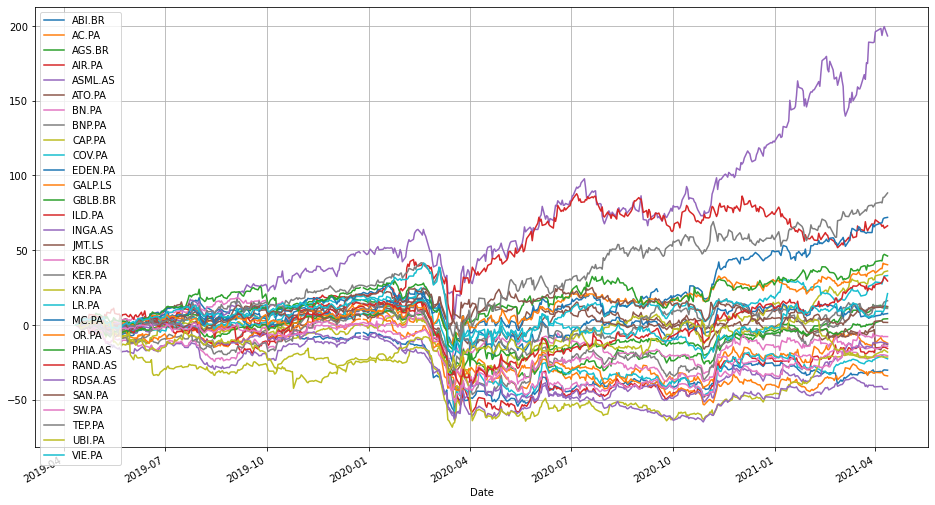

In [95]:
df_diff.plot(figsize=(16,9), grid=True)

In [96]:
top_n = 3
bottom_n = 5

In [97]:
df_diff.iloc[-1].sort_values(ascending=False)[:top_n] # top 10 best performing stocks

ASML.AS    193.419886
TEP.PA      88.303427
MC.PA       71.974343
Name: 2021-04-12 00:00:00, dtype: float64

In [98]:
df_diff.iloc[-1].sort_values(ascending=False)[-bottom_n:]  # top 10 worst performing stocks

KN.PA     -21.409107
COV.PA    -22.644282
ABI.BR    -30.251248
GALP.LS   -34.097576
RDSA.AS   -42.866111
Name: 2021-04-12 00:00:00, dtype: float64

In [99]:
ls_best = df_diff.iloc[-1].sort_values(ascending=False)[:top_n].index.to_list() # tickers of top 10 best performing stocks
ls_worst = df_diff.iloc[-1].sort_values(ascending=False)[-bottom_n:].index.to_list() # tickers of top 10 worst performing stocks
stocks_of_interest = ls_best+ls_worst

In [100]:
df_diff[stocks_of_interest]

,ASML.AS,TEP.PA,MC.PA,KN.PA,COV.PA,ABI.BR,GALP.LS,RDSA.AS
Date,,,,,,,,
2019-04-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-15,-0.928829,-0.810651,0.014587,0.467111,-0.314799,0.280568,-1.194133,-0.174342
2019-04-16,0.828109,-1.968728,0.991541,0.856367,0.472190,0.739694,-1.740021,-0.453281
2019-04-17,0.705010,-3.184713,2.318464,2.374469,-0.314799,-0.063771,-1.262364,-0.174342
2019-04-18,2.517905,-2.953093,2.741322,2.140913,-0.629597,1.823738,-1.671784,-0.435844
...,...,...,...,...,...,...,...,...
2021-04-06,198.399723,82.107704,68.212306,-21.272868,-21.070306,-31.105729,-31.954962,-41.171550
2021-04-07,193.699654,81.644480,68.328965,-21.233945,-20.419734,-31.692388,-31.490958,-41.192472
2021-04-08,197.672335,85.350325,70.924464,-21.564807,-20.755515,-30.417040,-32.828386,-42.608093


<AxesSubplot:xlabel='Date'>

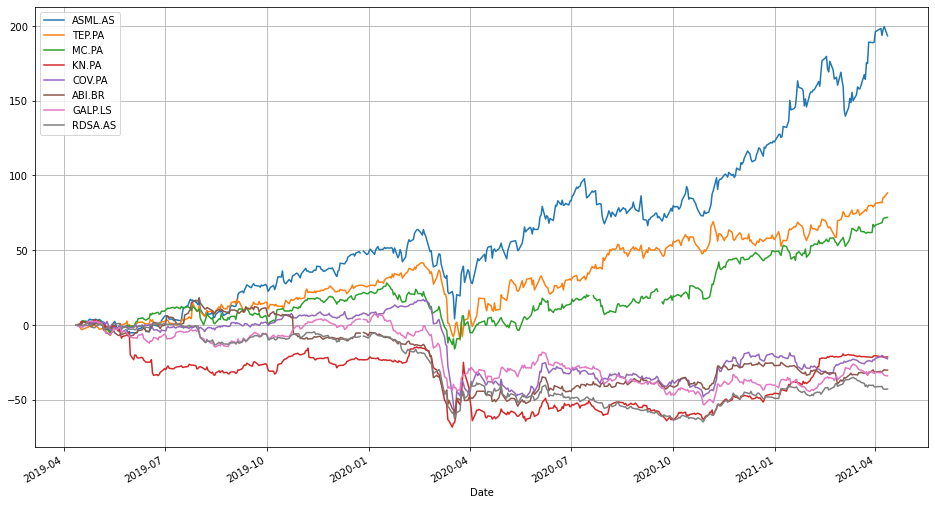

In [101]:
df_diff[stocks_of_interest].plot(figsize=(16,9), grid=True)

In [102]:
[yf.Ticker(tickercode).info["longName"] for tickercode in stocks_of_interest]

['ASML Holding N.V.',
 'Teleperformance SE',
 'LVMH Moët Hennessy - Louis Vuitton, Société Européenne',
 'Natixis S.A.',
 'Covivio',
 'Anheuser-Busch InBev SA/NV',
 'Galp Energia, SGPS, S.A.',
 'Royal Dutch Shell plc']